Initializing NUTS using jitter+adapt_diag...


Media: 58.00
Deviatia standard: 2.00



Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 46 seconds.
Initializing NUTS using jitter+adapt_diag...


         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     58.003  0.755    56.518     59.567      0.013    0.013    3340.0   
sigma   2.333  0.662     1.305      3.620      0.011    0.014    4438.0   

       ess_tail  r_hat  
mu       3523.0    1.0  
sigma    4661.0    1.0  

Putem observa din output ca:
HDI 95% pentru mu: [56.518, 59.567]
HDI 95% pentru sigma: [1.305, 3.620]

Estimari frecventiste:
Media: 58.0
Deviatia standard: 2.0

Estimari bayesiene:
mu: 58.003
sigma: 2.333

Diferentele sunt foarte mici pentru ca am folosit un prior slab. Credinta initiala este nesigura, deci observatiile din date determina rezultatul final. 


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 46 seconds.


         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
mu     51.381  1.078    49.282     53.491      0.019    0.012    3321.0   
sigma   7.540  2.059     3.945     11.656      0.036    0.031    3191.0   

       ess_tail  r_hat  
mu       3922.0    1.0  
sigma    3894.0    1.0  

Observa din output ca:
HDI 95% pentru mu: [49.282, 53.491]
HDI 95% pentru sigma: [3.945, 11.656]

Cu prior slab: 58.003 2.333
Frecventist: 58.0, 2.0
Cu prior puternic: 51.381 7.54

Rezultatele difera destul de mult de cele de la b) ci c), pentru ca priorul puternic impune o credinta mai sigura decat la punctele anterioare ca media este 50 dB,in timp ce datele indica 58 dB.


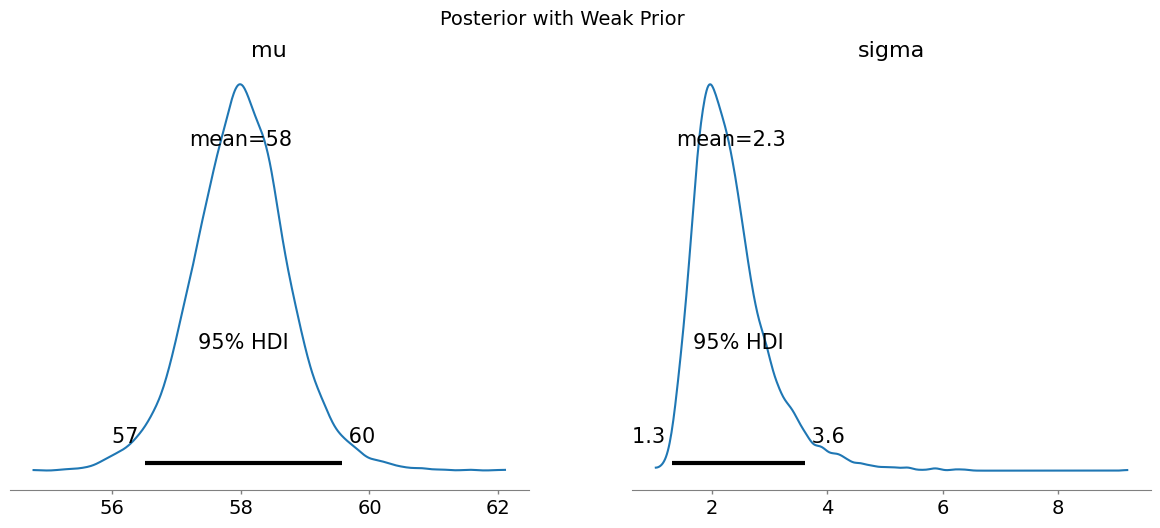

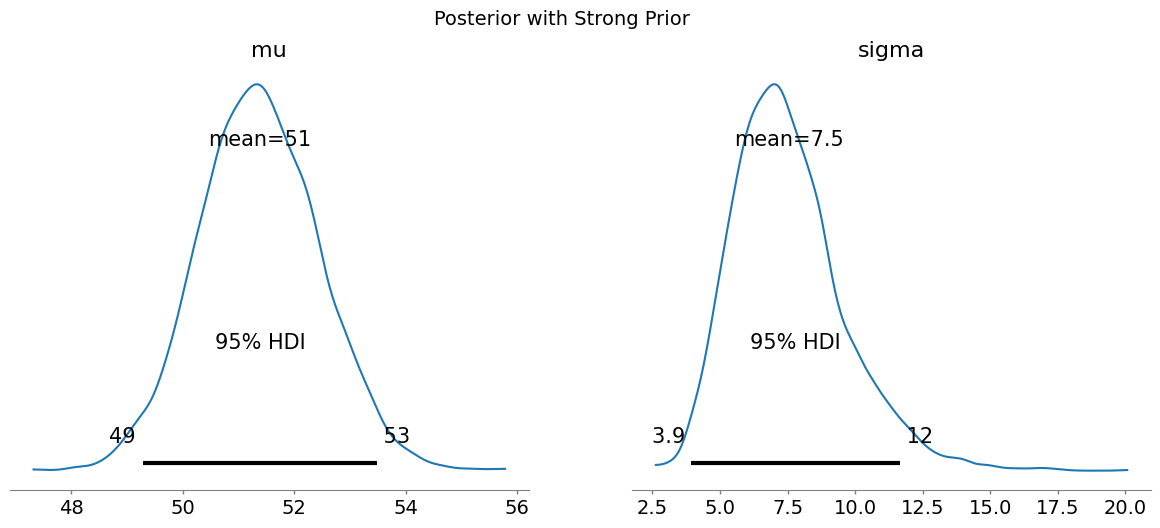

In [4]:
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

data = np.array([56, 60, 58, 55, 57, 59, 61, 56, 58, 60])
x_bar = data.mean()
sample_std = data.std(ddof=1)
print(f"Media: {x_bar:.2f}")
print(f"Deviatia standard: {sample_std:.2f}")
print()

# Punctul a
with pm.Model() as weak_model:
    mu = pm.Normal("mu", mu=x_bar, sigma=10)
    sigma = pm.HalfNormal("sigma", sigma=10)
    y = pm.Normal("y", mu=mu, sigma=sigma, observed=data)
    trace_weak = pm.sample(2000, tune=2000, target_accept=0.9, random_seed=42)

# Punctul b
summary_weak = az.summary(trace_weak, var_names=["mu", "sigma"], hdi_prob=0.95)
print(summary_weak)
print()

print("Putem observa din output ca:")
print("HDI 95% pentru mu: [56.518, 59.567]")
print("HDI 95% pentru sigma: [1.305, 3.620]")
print()

# Punctul c
frecv_mean = np.mean(data)
frecv_std = np.std(data, ddof=1)

# preluate din tabel
bayes_mean = 58.003
bayes_std = 2.333

print("Estimari frecventiste:")
print(f"Media: {frecv_mean}")
print(f"Deviatia standard: {frecv_std}")
print()

print("Estimari bayesiene:")
print(f"mu: {bayes_mean}")
print(f"sigma: {bayes_std}")
print()

print("Diferentele sunt foarte mici pentru ca am folosit un prior slab. Credinta initiala este nesigura, deci observatiile din date determina rezultatul final. ")

# Punctul d
with pm.Model() as strong_model:
    mu = pm.Normal("mu", mu=50, sigma=1)
    sigma = pm.HalfNormal("sigma", sigma=10)
    y = pm.Normal("y", mu=mu, sigma=sigma, observed=data)
    trace_strong = pm.sample(2000, tune=2000, target_accept=0.9, random_seed=42)
    summary_strong = az.summary(trace_strong, var_names=["mu", "sigma"], hdi_prob=0.95)

print(summary_strong)
print()

strong_mean = 51.381
strong_std = 7.540

print("Observa din output ca:")
print(f"HDI 95% pentru mu: [49.282, 53.491]")
print(f"HDI 95% pentru sigma: [3.945, 11.656]")
print()

print(f"Cu prior slab: {bayes_mean} {bayes_std}")
print(f"Frecventist: {frecv_mean}, {frecv_std}")
print(f"Cu prior puternic: {strong_mean} {strong_std}")
print()

print("Rezultatele difera destul de mult de cele de la b) ci c), pentru ca priorul puternic impune o credinta mai sigura decat la punctele anterioare ca media este 50 dB,in timp ce datele indica 58 dB.")

az.plot_posterior(trace_weak, var_names=["mu", "sigma"], hdi_prob=0.95)
plt.suptitle("Posterior with Weak Prior", fontsize=14)
plt.show()

az.plot_posterior(trace_strong, var_names=["mu", "sigma"], hdi_prob=0.95)
plt.suptitle("Posterior with Strong Prior", fontsize=14)
plt.show()